In [37]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
import os.path
import csv
from tensorflow.python.framework import ops
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
# reset computational graph
ops.reset_default_graph()   
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
bc=pd.read_csv("BreastCancerData.csv")
bc.head()  
P=bc.iloc[:,2:32]
bc.iloc[:,2:32].describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [16]:
yd=pd.get_dummies(bc.diagnosis)
y=yd.M   #y=1為Ｍ ,  y=0為非Ｍ（Ｂ）
y.head() # response variable

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [55]:
# standardizing 
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
#PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
P_scaled.head(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [23]:
#Splitting the data: training and test

from sklearn.cross_validation import train_test_split
#X=(Xy.iloc[:,0:11]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(P_scaled, y, test_size=0.25, random_state=0)

/Applications/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
print( X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [59]:
# KNN
# fitting the knn model on the training data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn =knn.predict(X_test)

# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_knn)
print('KNN:\n confusion matrix\n', c_m,'\n')
# classification report
print('Classification report :\n',classification_report(y_test, y_pred_knn, digits=3))

KNN:
 confusion matrix
 [[89  1]
 [ 6 47]] 

Classification report :
              precision    recall  f1-score   support

          0      0.937     0.989     0.962        90
          1      0.979     0.887     0.931        53

avg / total      0.953     0.951     0.950       143



In [58]:
# SVC
# fitting the SVC model on the training data and predicting for test data
from sklearn.svm import SVC
svc=SVC(C=100,gamma=0.001,kernel='rbf',probability=True)
svc.fit(X_train, y_train)
y_pred_svc =svc.predict(X_test)

# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_svc)
print('SVC:\n confusion matrix\n', c_m,'\n')
# classification report
print('Classification report: \n',classification_report(y_test, y_pred_svc, digits=3))

SVC:
 confusion matrix
 [[89  1]
 [ 2 51]] 

Classification report: 
              precision    recall  f1-score   support

          0      0.978     0.989     0.983        90
          1      0.981     0.962     0.971        53

avg / total      0.979     0.979     0.979       143



In [57]:
# Logistic Regression
# fitting the lgr model on the training data
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)
y_pred_lgr =lgr.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_lgr)
print('Logistic Regression:\nconfusion matrix\n', c_m,'\n')
# classification report
print('Classification report: \n',classification_report(y_test, y_pred_lgr, digits=3))

Logistic Regression:
confusion matrix
 [[88  2]
 [ 3 50]] 

Classification report: 
              precision    recall  f1-score   support

          0      0.967     0.978     0.972        90
          1      0.962     0.943     0.952        53

avg / total      0.965     0.965     0.965       143



In [61]:
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(P_scaled)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())


(569, 10)
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
0.9515688143366668


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,diagnosis
0,9.19284,1.94858,-1.12317,3.63373,-1.19511,1.41142,2.15937,-0.398407,-0.157118,-0.877402,M
1,2.3878,-3.76817,-0.529293,1.11826,0.621775,0.0286564,0.0133581,0.240988,-0.711905,1.10699,M
2,5.7339,-1.07517,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.0973737,0.0240656,0.454275,M
3,7.12295,10.2756,-3.23279,0.152547,-2.96088,3.05342,1.42991,1.05957,-1.40544,-1.11698,M
4,3.9353,-1.94807,1.38977,2.94064,0.546747,-1.22649,-0.936213,0.636376,-0.263805,0.377704,M
5,2.38025,3.94993,-2.93488,0.941037,-1.05604,-0.451039,0.490445,-0.165444,-0.133473,-0.530431,M
6,2.23888,-2.69003,-1.63991,0.14934,0.0403595,-0.128948,-0.301567,0.0836982,-0.0800246,0.219143,M
7,2.1433,2.34024,-0.871947,-0.127043,-1.42744,-1.25704,0.9741,-0.653338,0.248184,1.00059,M
8,3.17492,3.39181,-3.11999,-0.601297,-1.52229,0.559545,-0.215104,-0.687341,0.511924,0.0291875,M
9,6.35175,7.72717,-4.34192,-3.3752,1.71026,-0.723909,2.51984,0.365149,-0.717397,-1.16563,M


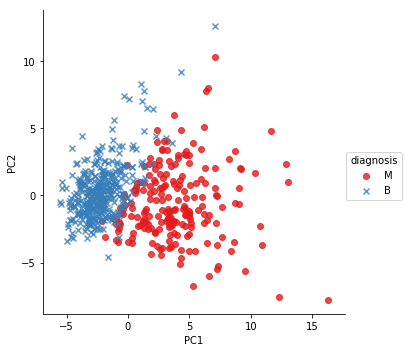

In [71]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','diagnosis']
d=bc.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d.values]),columns=n)
# plotting the the first 2 pca components against diagnosis
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False,markers=["o", "x"],palette="Set1")
sns.plotting_context